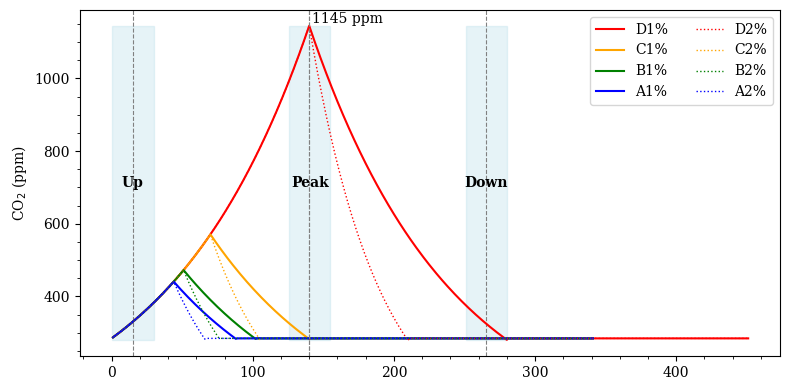

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# ==================================================
# Load the Excel file and clean the data
# ==================================================
file_path = 'CO2_Concentration_UKESM1.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1', skiprows=3)

# Rename columns for clarity
data.columns = [
    "Year", "Time", "D_Experiment", "D_Null", 
    "C_Experiment", "C_Null", "B_Experiment", 
    "B_Null", "A_Experiment", "A_Null"
]

# Drop rows with NaN values in the "Year" column
data = data.dropna(subset=["Year"])

# Convert the "Year" column to integers and adjust to start from 1
data["Year"] = data["Year"].astype(int) - 1849

# ==================================================
# Figure & Font Settings (AGU Earth Future)
# ==================================================
plt.rcParams.update({
    "font.family": "serif",    # Times New Roman style
    "font.size": 10,            # Base font size
    "axes.labelsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10
})

# Create figure with AGU double-column width
fig, ax = plt.subplots(figsize=(8, 4))  # 7.09 in = 180 mm

# ==================================================
# Define colors for each experiment
# ==================================================
colors = {
    "D": "red",
    "C": "orange",
    "B": "green",
    "A": "blue"
}

# ==================================================
# Plot lines (-1% solid, -2% dotted)
# ==================================================
lw_solid = 1.5
lw_dotted = 1.0

ax.plot(data["Year"], data["D_Experiment"], color=colors["D"], lw=lw_solid, label="D1%")
ax.plot(data["Year"], data["C_Experiment"], color=colors["C"], lw=lw_solid, label="C1%")
ax.plot(data["Year"], data["B_Experiment"], color=colors["B"], lw=lw_solid, label="B1%")
ax.plot(data["Year"], data["A_Experiment"], color=colors["A"], lw=lw_solid, label="A1%")

ax.plot(data["Year"], data["D_Null"], color=colors["D"], linestyle='dotted', lw=lw_dotted, label="D2%")
ax.plot(data["Year"], data["C_Null"], color=colors["C"], linestyle='dotted', lw=lw_dotted, label="C2%")
ax.plot(data["Year"], data["B_Null"], color=colors["B"], linestyle='dotted', lw=lw_dotted, label="B2%")
ax.plot(data["Year"], data["A_Null"], color=colors["A"], linestyle='dotted', lw=lw_dotted, label="A2%")

# ==================================================
# Highlight shaded periods
# ==================================================
highlight_ranges = [(0, 30, "Up"), (126, 155, "Peak"), (251, 280, "Down")]
for start, end, title in highlight_ranges:
    rect = patches.Rectangle(
        (start, data["D_Experiment"].min()), 
        end - start, 
        data["D_Experiment"].max() - data["D_Experiment"].min(),
        color='lightblue', alpha=0.3, zorder=0
    )
    ax.add_patch(rect)
    ax.text(
        (start + end) / 2, 
        (data["D_Experiment"].min() + data["D_Experiment"].max()) / 2,
        title,
        color="black", fontsize=10,
        ha="center", va="center", fontweight="bold"
    )

# ==================================================
# Add vertical lines at specified positions
# ==================================================
vertical_lines = [15, 140, 265]
for vline in vertical_lines:
    ax.axvline(x=vline, color="gray", linestyle="--", lw=0.8, zorder=1)


# ==================================================
# Annotate peak value
# ==================================================
peak_year = data.loc[data["D_Experiment"].idxmax(), "Year"]
peak_value = data["D_Experiment"].max()
ax.axvline(x=peak_year, color="gray", linestyle="--", lw=0.8)
ax.text(peak_year + 2, peak_value, f"{peak_value:.0f} ppm", fontsize=10, va="bottom", ha="left")

# ==================================================
# Axis Labels & Legend
# ==================================================
#ax.set_xlabel("Year")
ax.set_ylabel("CO$_2$ (ppm)")
ax.legend(ncol=2, frameon=True, loc="upper right")  # 2-column legend

# ==================================================
# Final Formatting
# ==================================================
ax.minorticks_on()
ax.grid(False)

plt.tight_layout()

# ==================================================
# Save figure for Earth Future submission
# ==================================================
plt.savefig('Figure_1.tif', dpi=600, bbox_inches='tight')  # high-res TIFF
plt.show()
